<a href="https://colab.research.google.com/github/muwongelawrence-tech/colab_projects/blob/main/crops_and__weeds_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !wget https://drive.google.com/file/d/1MjlDFKUM4Yb6p0j9QLy0th2Uaqw-nqP-/view?usp=sharing \
# -O /tmp/weed_crop_classifier_dataset.zip

# Mounting google drive to get files from there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Then unzip the files to be used 
# !unzip drive/My\ Drive/Data_sets/weed_crop_classifier_dataset.zip
# knowing the current directory with pwd commad
!pwd

/content


In [ ]:
# import os
# import zipfile

# local_zip = '/drive/MyDrive/Data_sets/weed_crop_classifier_dataset.zip'

# zip_ref = zipfile.ZipFile(local_zip, 'r')

# zip_ref.extractall('/content')
# zip_ref.close()

In [2]:
import os

base_dir = '/content/drive/MyDrive/weed_crop_classifier_dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training crops (maize and beans) and weeds (elephant grass and wandering jew)
train_beans_dir = os.path.join(train_dir, 'beans')
train_elephant_grass_dir = os.path.join(train_dir, 'elephant grass')
train_maize_dir = os.path.join(train_dir, 'maize')
train_wandering_jew_dir = os.path.join(train_dir, 'wandering jew')

# Directory with our validation crops (maize and beans) and weeds (elephant grass and wandering jew)
validation_beans_dir = os.path.join(validation_dir, 'beans')
validation_elephant_grass_dir = os.path.join(validation_dir, 'elephant grass')
validation_maize_dir = os.path.join(validation_dir, 'maize')
validation_wandering_jew_dir = os.path.join(validation_dir, 'wandering jew')

In [3]:
train_beans_fnames = os.listdir( train_beans_dir )
train_elephant_grass_fnames = os.listdir( train_elephant_grass_dir )
train_maize_fnames = os.listdir( train_maize_dir )
train_wandering_jew_fnames = os.listdir( train_wandering_jew_dir )

print(train_beans_fnames[:10])
print(train_elephant_grass_fnames[:10])
print(train_maize_fnames[:10])
print(train_wandering_jew_fnames[:10])

['1619172371011.jpg', '1619172013482.jpg', '1619172052383.jpg', '1619172322917.jpg', '1619172078204.jpg', '1619174957224.jpg', '1619172395277.jpg', '1619175020383.jpg', '1619159349341.jpg', '1619174834204.jpg']
['20220803_151235.jpg', '20220803_151238.jpg', '20220803_151245.jpg', '20220803_151248.jpg', '20220803_151251.jpg', '20220803_151258.jpg', '20220803_151302.jpg', '20220803_151305.jpg', '20220803_151311.jpg', '20220803_151314.jpg']
['20220803_145100.jpg', '20220803_145105.jpg', '20220803_145110.jpg', '20220803_145114.jpg', '20220803_145119.jpg', '20220803_145125.jpg', '20220803_145129.jpg', '20220803_145136.jpg', '20220803_145142.jpg', '20220803_145145.jpg']
['20220801_124903.jpg', '20220801_124915.jpg', '20220801_124925.jpg', '20220801_125034.jpg', '20220801_125133.jpg', '20220801_125152.jpg', '20220801_125205.jpg', '20220801_125216.jpg', '20220801_125252.jpg', '20220801_125300.jpg']


In [4]:
print('---------------------- TRAINING IMAGE STATISTICS------------\n')
print('total training beans images :', len(os.listdir( train_beans_dir   ) ))
print('total training elephant grass images :', len(os.listdir( train_elephant_grass_dir  ) ))
print('total training maize  images :', len(os.listdir( train_maize_dir   ) ))
print('total training wandering jew images :', len(os.listdir( train_wandering_jew_dir  ) ))

print('\n---------------------- VALIDATION IMAGE STATISTICS------------\n')

print('total validation beans images :', len(os.listdir( validation_beans_dir ) ))
print('total validation elephant grass images :', len(os.listdir( validation_elephant_grass_dir ) ))
print('total validation maize images :', len(os.listdir( validation_maize_dir ) ))
print('total validation wandering jew images :', len(os.listdir( validation_wandering_jew_dir ) ))

---------------------- TRAINING IMAGE STATISTICS------------

total training beans images : 1606
total training elephant grass images : 1051
total training maize  images : 875
total training wandering jew images : 900

---------------------- VALIDATION IMAGE STATISTICS------------

total validation beans images : 600
total validation elephant grass images : 332
total validation maize images : 200
total validation wandering jew images : 205


In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

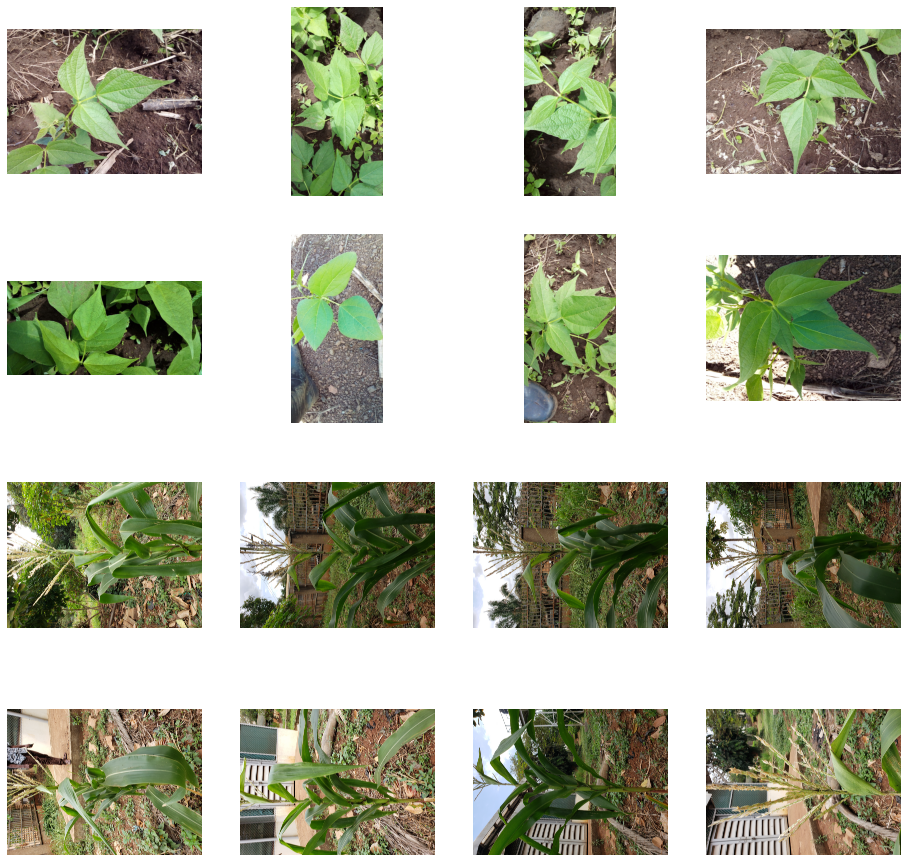

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_beans_pix = [os.path.join(train_beans_dir, fname) 
                for fname in train_beans_fnames[ pic_index-8:pic_index] 
               ]

next_maize_pix = [os.path.join(train_maize_dir, fname) 
                for fname in train_maize_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_beans_pix+next_maize_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
import tensorflow as tf
import numpy as np

In [9]:
# # laying out the structure /layers of the  model
# model = tf.keras.models.Sequential([
#     #Note the input shape is the desired size of the image 224x224 with 3 bytes color
#     tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding='same', input_shape = (224, 224, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2), 
#     tf.keras.layers.Conv2D(128, (3,3), padding='same', activation = 'relu'), 
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(256, (3,3), padding='same', activation = 'relu'), 
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(512, (3,3), padding='same', activation = 'relu'), 
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(1024, (3,3), padding='same', activation = 'relu'), 
#     tf.keras.layers.MaxPooling2D(2,2),
#     # preventing the problem of overfitting using the Dropout layer
#     tf.keras.layers.Dropout(0.5),
#     # Flatten the results to feed into a Dense Nueral Network
#     tf.keras.layers.Flatten(), 
#     # Fully connected layer of 512 neurons.
#     tf.keras.layers.Dense(512, activation = 'relu'), 
#     tf.keras.layers.Dense(4, activation = 'softmax')  
# ])


#  OR LOADING THE ALREADY TRAINED MODEL.
# Lets use the already trained(saved  model)
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/classifier model with its lite version/crop_weed_classifier_model.h5')

In [11]:
# GETTING INFORMATION ABOUT THE SUMMARY OF THE MODEL
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
# IF TRAINING , THEN FIRST COMPILE THE MODEL
# from tensorflow.keras.optimizers import RMSprop

# model.compile(optimizer=RMSprop(lr=0.001),
#               loss='categorical_crossentropy',
#               metrics = ['accuracy'])

# changing to a different optimizer function(Adam)

model.compile(optimizer='adam',loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 after going through the image Generator
# And also performing Data augumentation to enhance the capacity of the dataset.


# preparing the train image generator with validation
train_datagen = ImageDataGenerator(
     rescale = 1.0/255,
     rotation_range = 40,
     width_shift_range = 0.2,
     height_shift_range = 0.2,
     shear_range = 0.2,
     zoom_range = 0.2,
     horizontal_flip = True,
     fill_mode = 'nearest'
)

# preparing the validation image generator with augmentation
# test_datagen  = ImageDataGenerator( rescale = 1.0/255,
#                                     rotation_range = 40,
#                                     width_shift_range = 0.2,
#                                     height_shift_range = 0.2,
#                                     shear_range = 0.2,
#                                     zoom_range = 0.2,
#                                     horizontal_flip = True,
#                                     fill_mode = 'nearest'
#                           )

# for confusion matrix analysis test data generator is defined as follows.
test_datagen = ImageDataGenerator(rescale=1. / 255)

# --------------------
# Flow training images in batches of 100 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 300,
                                                    class_mode = 'categorical',
                                                    target_size = (224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size = 100,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))


Found 4431 images belonging to 4 classes.
Found 1337 images belonging to 4 classes.


Confusion Matrix
[[271 166 120  43]
 [153  96  60  23]
 [ 82  60  37  21]
 [ 83  63  36  23]]


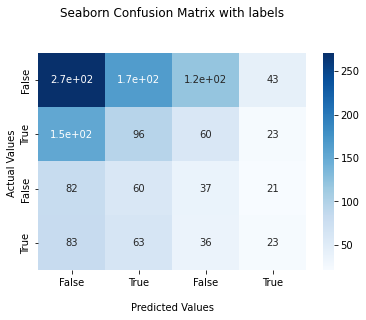

Classification Report
                precision    recall  f1-score   support

         beans       0.46      0.45      0.46       600
elephant grass       0.25      0.29      0.27       332
         maize       0.15      0.18      0.16       200
 wandering jew       0.21      0.11      0.15       205

      accuracy                           0.32      1337
     macro avg       0.27      0.26      0.26      1337
  weighted avg       0.32      0.32      0.32      1337



In [21]:
# GETTING INFORMATION ABOUT THE CONFUSION MATRIX OF THE MODEL
# importing required dependencies.
import numpy as np
from keras import backend as K
# from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation, Flatten
# from keras.layers.convolutional import Convolution2D, MaxPooling2D
# from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

batch_size = 100
num_of_train_samples = 3000
num_of_test_samples = 1337

#Confution Matrix and Classification Report
# validation_generator = validation_generator.reset()
Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1,  verbose = 'auto')
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

cf_matrix = confusion_matrix(validation_generator.classes, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True','False','True'])
ax.yaxis.set_ticklabels(['False','True', 'False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


# ----------ANALYSING THE CLASSIFICATION REPORT---------------------
print('Classification Report')
target_names = ['beans', 'elephant grass', 'maize','wandering jew']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
# Plotting the data to see classes assigned to them by keras
# imgs, labels = next(train_generator)
# imgs, labels  = train_generator.next()
# plots(imgs, titles=labels)

In [ ]:
# Getting the predictions of the classes assigned by the keras DateGennerator
# predictions = model.predict_generator(train_generator, steps=1, verbose=0)
# predictions

In [ ]:
# Knowing classes assigned by Image DataGenerator without having to plot the data
# we use the class indices property from the imageDataGenerator
print('---lets see the classes assigned to the train generator by keras.---')
train_generator.class_indices






---lets see the classes assigned to the train generator by keras.---


{'beans': 0, 'elephant grass': 1, 'maize': 2, 'wandering jew': 3}

In [ ]:
print('---lets see the classes assigned to the validation generator by keras.---')
validation_generator.class_indices

---lets see the classes assigned to the validation generator by keras.---


{'beans': 0, 'elephant grass': 1, 'maize': 2, 'wandering jew': 3}

In [ ]:
# Training to a desired accuracy and quit after reaching a desired accuracy.
# Then with callbacks no need of training the model to very many number of epochs.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')< 0.1):
      print("\nReached 90% accuracy so the  training process is cancelled !")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# Training the model or using the already trained model.
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size = 300,
                    steps_per_epoch = 12, 
                    epochs = 20, 
                    validation_steps = 9, 
                    verbose = 'auto',
                    callbacks = [callbacks]
              )


# fit model on the augmented dataset using the fit_generator.
# history = model.fit_generator(
#                     train_generator,
#                     validation_data = validation_generator,
#                    ) 




Epoch 1/20
12/12 [==============================] - 2662s 219s/step - loss: 1.5160 - accuracy: 0.3268 - val_loss: 1.3504 - val_accuracy: 0.4478
Epoch 2/20
12/12 [==============================] - 1587s 131s/step - loss: 1.3280 - accuracy: 0.3874 - val_loss: 1.0831 - val_accuracy: 0.5289
Epoch 3/20
12/12 [==============================] - 1484s 122s/step - loss: 1.1065 - accuracy: 0.4908 - val_loss: 0.8721 - val_accuracy: 0.5433
Epoch 4/20
12/12 [==============================] - 1416s 116s/step - loss: 0.9808 - accuracy: 0.5350 - val_loss: 0.7914 - val_accuracy: 0.5822
Epoch 5/20
12/12 [==============================] - 1458s 119s/step - loss: 0.8153 - accuracy: 0.5956 - val_loss: 0.7408 - val_accuracy: 0.6600
Epoch 6/20
12/12 [==============================] - 1417s 116s/step - loss: 0.7761 - accuracy: 0.6409 - val_loss: 0.7343 - val_accuracy: 0.6222
Epoch 7/20
12/12 [==============================] - 1420s 117s/step - loss: 0.7098 - accuracy: 0.6879 - val_loss: 0.7258 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

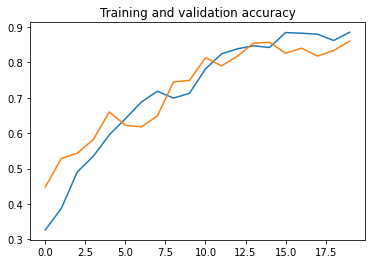

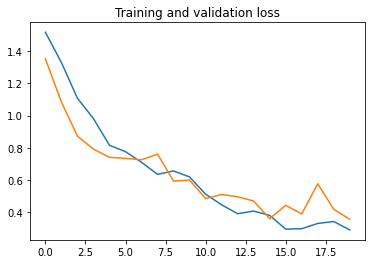

In [ ]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]

loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs
# print(epochs)
# print(acc)
# print(val_acc)
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs,     val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
# saving the trained model to the specied path
# model.save("/content/model")

# creates a HDF5 file 'crop_weed_classifier_model.h5'
#model.save('crop_weed_classifier_model.h5')  
# del model  # deletes the existing model

# How to load the saved model

from keras.models import load_model
model = load_model('/content/drive/MyDrive/classifier model with its lite version/crop_weed_classifier_model.h5')
model.summary()

# tflite_model_file = '/content/drive/MyDrive/classifier model with its lite version/model.tflite'

# # Load TFLite model and allocate tensors.
# with open(tflite_model_file, 'rb') as fid:
#     tflite_model = fid.read()
    
# model = tf.lite.Interpreter(model_content = tflite_model)
# model.allocate_tensors()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
# converting the model to tensorflowlite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# save the model 
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# Download files from colab
# from google.colab import files
# files.download('/content/sample_data/README.md')

# How to Download Folders from Colab
# !zip -r /content/sample_data.zip /content/sample_data

# lets download the models folder after zipping
# !zip -r /content/model.zip /content/model



In [ ]:
import numpy as np

# importing files from computer to colab for testing accuracy of the model.
from google.colab import files
from keras.preprocessing import image
# from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Getting predicting images and  transform them to target size.
  path='/content/' + fn
  img = image.load_img(path, target_size = (224, 224))
  
  # changing the received image into an array of pixels.
  x = image.img_to_array(img)
  
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size = 10) 

  print(f'The predicted class is { classes[0] }')
  

  if np.array_equal(classes[0], [1.0 ,0.0 ,0.0, 0.0]):
    print(fn + " is a bean plantation.")
  elif np.array_equal(classes[0], [0.0 ,1.0 ,0.0, 0.0]):
    print(fn + " is a plantation of elephant grass (weed). ")
  elif np.array_equal(classes[0], [0.0 ,0.0 ,1.0, 0.0]):
    print(fn + " is a maize plantation. ")
  elif np.array_equal(classes[0], [0.0 ,0.0 ,0.0, 1.0]):
    print(fn + " is a wandering jew plantation (weed). ")
  else:
    print(fn + " is not a recognized class in the system. ")



Saving 1619076374628.jpg to 1619076374628.jpg
The predicted class is [1. 0. 0. 0.]
1619076374628.jpg is a bean plantation.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


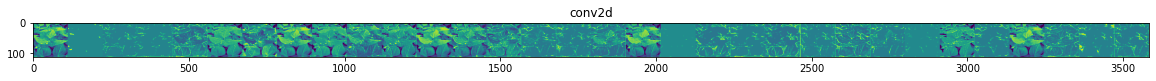

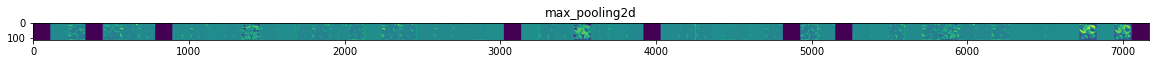

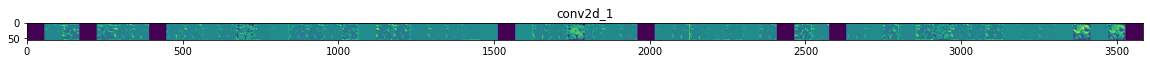

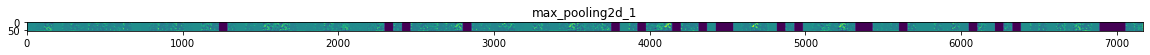

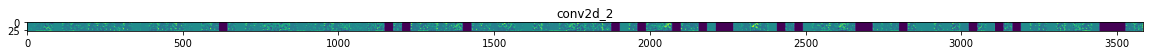

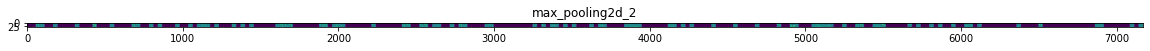

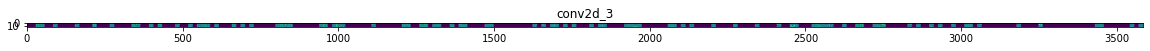

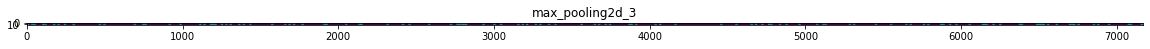

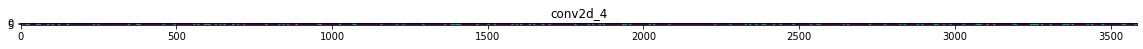

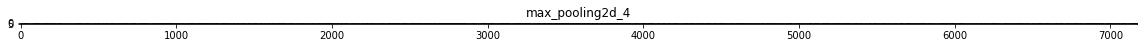

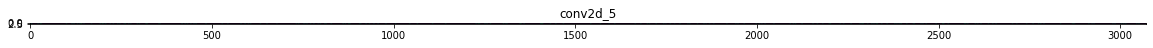

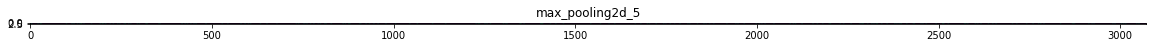

In [ ]:
# Visualizing Intermediate Representations
import numpy as np
import random
from  tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


# Let's prepare a random input image of a crop or weed from the training set.
beans_img_files = [os.path.join(train_beans_dir, f) for f in train_beans_fnames]
elephant_grass_img_files = [os.path.join(train_elephant_grass_dir, f) for f in train_elephant_grass_fnames]
maize_img_files = [os.path.join(train_maize_dir, f) for f in train_maize_fnames]
wandering_jew_img_files = [os.path.join(train_wandering_jew_dir, f) for f in train_wandering_jew_fnames]

img_path = random.choice(beans_img_files + elephant_grass_img_files)
img = load_img(img_path, target_size=(224, 224))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [ ]:
Clean Up to release the resources
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )